In [1]:
from SNE_Calculations.calculations import *
from Helpers.header import *
from Helpers.print_help import *

In [2]:
def q_tsne(Y):
    """t-SNE: Given low-dimensional representations Y, compute
    matrix of joint probabilities with entries q_ij."""
    distances = neg_squared_euc_dists(Y)
    inv_distances = np.power(1. - distances, -1)
    np.fill_diagonal(inv_distances, 0.)
    return inv_distances / np.sum(inv_distances), inv_distances

In [3]:
def tsne_grad(P, Q, Y, inv_distances):
    """Estimate the gradient of t-SNE cost with respect to Y."""
    pq_diff = P - Q
    pq_expanded = np.expand_dims(pq_diff, 2)
    y_diffs = np.expand_dims(Y, 1) - np.expand_dims(Y, 0)

    # Expand our inv_distances matrix so can multiply by y_diffs
    distances_expanded = np.expand_dims(inv_distances, 2)

    # Multiply this by inverse distances matrix
    y_diffs_wt = y_diffs * distances_expanded

    # Multiply then sum over j's
    grad = 4. * (pq_expanded * y_diffs_wt).sum(1)
    return grad

In [4]:
TSNE = True # True for t-SNE, False for Symmetric SNE

def main():
    # numpy RandomState for reproducibility
    rng = np.random.RandomState(SEED)

    X, y = load_from_csv('Datasets/mnist_test.csv')

    # Obtain matrix of joint probabilities p_ij
    P = p_joint(X, PERPLEXITY)
    # Fit SNE or t-SNE
    Y = estimate_sne(X, y, P, rng,
             num_iters=NUM_ITERS,
             q_fn=q_tsne,
             grad_fn=tsne_grad,
             learning_rate=LEARNING_RATE,
             momentum=MOMENTUM,
             plot=NUM_PLOTS,
             title='t-SNE')

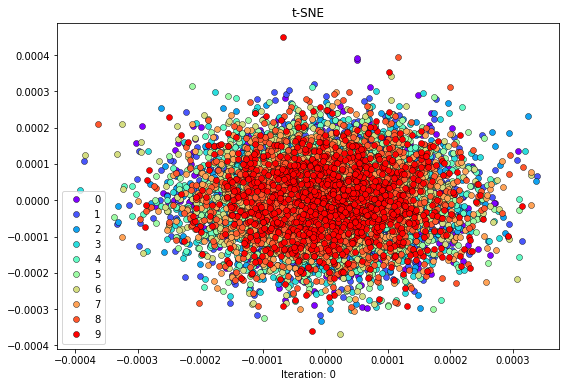

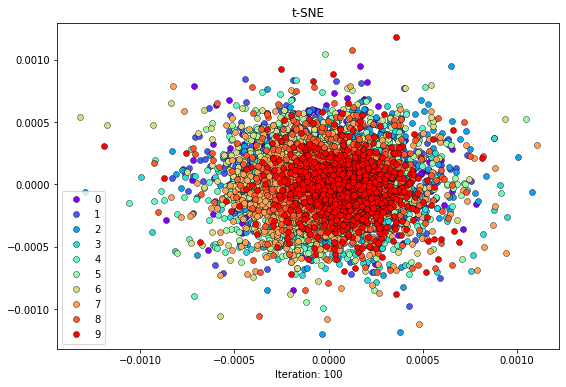

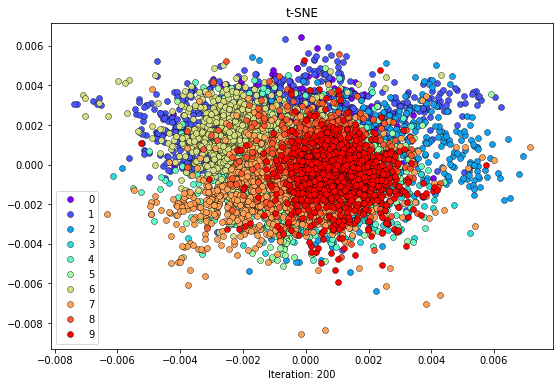

In [5]:
main()